# Homework 5

### Name: Hannah Marr
### Collaborator:


DATA 201

Fall 2024

Tufts University

This homework explores KNN, Decision Trees, and Random Forests. The first question reviews training a KNN model. Subsequent questions provide an in-depth examination of Gini impurity and the mechanics of training a Decision Tree. Following this, we delve into basic implementations of both Decision Trees and Random Forests, accompanied by an introduction to tuning hyperparameters.

# Question 1

(a) Load the Heart Disease dataset and name it 'df'. Conduct data cleaning.

- Perform any data cleaning or data transformation steps if required
- Explain some of the data cleaning steps which you can perform on **any** data set

For clarification, please find the metadata below:
- BPMeds: whether or not the patient was on blood pressure medication
- prevalentStroke: whether or not the patient had previously had a stroke
- prevalentHyp: whether or not the patient was hypertensive
- diabetes: whether or not the patient had diabetes
- totChol: total cholesterol level
- sysBP: systolic blood pressure
- diaBP: diastolic blood pressure
- BMI: Body Mass Index
- heartRate: heart rate
- glucose: glucose level
- 10 year risk of coronary heart disease CHD (binary: “1”, means “Yes”, “0” means “No”) (Predictor Variable)

(b) Create two dataframes for features and target variable (TenYearCHD). Conduct a full model training and testing (30%) for a KNN model with K=5. Print the accuracy, confusion matrix, and explain what the confuison matrix tells you

(c) Create a range from 1 to 50 going at steps of 2 then make a list where you will store average accuracy at each k value
use a for loop to compute the average accuracy over 10-fold cross validation for each k value. Plot the average accuracy for each k values and determine which k value you will choose.

In [5]:
#Q1 (a)
import pandas as pd

# Load the dataset
file_path = "/Users/hannahmarr/Desktop/Tufts/DATA201/Heart_Disease.csv"
df = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


#Q1 (a)
Here are some common data cleaning steps that we can apply:
1. Handling Missing Values: Check for any missing or NaN values and decide how to handle them (drop or fill with mean/median).
2. Data Type Conversion: Ensure that columns have appropriate data types (e.g., numerical values should not be stored as strings).
3. Outlier Detection: Identify and potentially address outliers, especially in columns like totChol, sysBP, and glucose.
4. Standardization: Ensure consistent units, especially for medical data (e.g., cholesterol levels might need adjustments).
5. Dropping Irrelevant Features: If some columns are not useful for analysis, they can be removed.
6. Duplicate Rows: Check for and remove any duplicate records.

In [9]:
#Q1 (a)
# Performing some of the above data cleaning steps on the dataset
# Check for missing values
missing_values = df.isnull().sum()

# Check the data types of each column
data_types = df.dtypes

# Check for duplicate rows
duplicate_rows = df.duplicated().sum()

# Summary of missing values, data types, and duplicate rows
summary = pd.DataFrame({
    "Missing Values": missing_values,
    "Data Type": data_types,
    "Duplicate Rows": duplicate_rows
})

# Display the summary
summary

,Missing Values,Data Type,Duplicate Rows
male,0,int64,0
age,0,int64,0
education,105,float64,0
currentSmoker,0,int64,0
cigsPerDay,29,float64,0
BPMeds,53,float64,0
prevalentStroke,0,int64,0
prevalentHyp,0,int64,0
diabetes,0,int64,0
totChol,50,float64,0


#Q1 (a)
The dataset analysis reveals several aspects for data cleaning:

1. Missing Values: Some columns, such as education, cigsPerDay, BPMeds, totChol, BMI, heartRate, and glucose, have missing values. We need to decide whether to drop these rows or fill them with appropriate values (e.g., mean or median).
2. Data Types: The data types are mostly correct, with numerical columns identified as int64 or float64.
3. Duplicates: No duplicate rows were found.

Next, let's handle the missing values and finalize the cleaning process. I will:

1. Fill missing values in numerical columns with the median.
2. Drop rows with excessive missing data in critical columns (glucose has many missing values).

In [14]:
#Q1 (a)
# Fill missing numerical values with the median of each column
df.fillna(df.median(numeric_only=True), inplace=True)

# Verify if all missing values have been handled
cleaned_summary = df.isnull().sum()

# Display the cleaned summary
cleaned_summary

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

#Q1 (a)

The data cleaning process is complete. All missing values have been filled using the median, and there are no remaining missing values in the dataset.

---

In [30]:
#Q1 (b)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Split the data into features (X) and target variable (y)
X = df.drop(columns=["TenYearCHD"])
y = df["TenYearCHD"]

# Standardize the feature data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training (70%) and testing (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Initialize and train the KNN model with K=5
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn_model.predict(X_test)

# Calculate accuracy and confusion matrix
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Display results
print('Accuracy:', accuracy)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.8349056603773585
Confusion Matrix:
 [[1042   35]
 [ 175   20]]


#Q1 (b)

Model Results:
* Accuracy: The KNN model achieved an accuracy of 83.49% on the test dataset.

Confusion Matrix Explanation:
* True Negatives (1042): The model correctly predicted 1042 instances as "No risk" (0) for TenYearCHD.
* False Positives (35): The model incorrectly predicted "Yes risk" (1) for 35 instances that were actually "No risk" (0).
* False Negatives (175): The model incorrectly predicted "No risk" (0) for 175 instances that were actually "Yes risk" (1).
* True Positives (20): The model correctly predicted 20 instances as "Yes risk" (1) for TenYearCHD.

The model has good performance in identifying individuals without the risk, but it struggles more with correctly identifying those who are at risk (low number of true positives). This suggests potential issues with imbalanced classes.

---

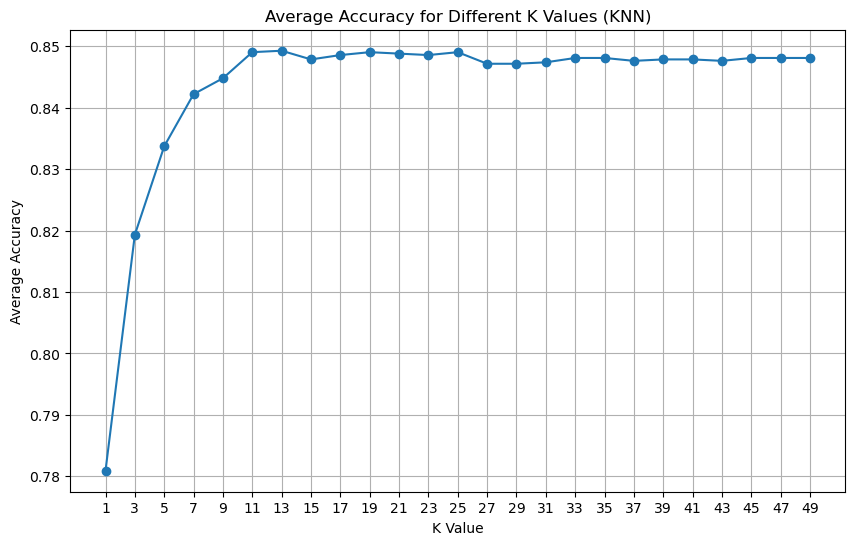

Best K value: 13


In [39]:
#Q1 (c)
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

# Create a range of K values from 1 to 50 with steps of 2
k_values = list(range(1, 51, 2))
average_accuracies = []

# Compute the average accuracy over 10-fold cross-validation for each K value
for k in k_values:
    knn_model = KNeighborsClassifier(n_neighbors=k)
    # Perform 10-fold cross-validation and store the mean accuracy
    scores = cross_val_score(knn_model, X_scaled, y, cv=10, scoring="accuracy")
    average_accuracies.append(scores.mean())

# Plot the average accuracy for each K value
plt.figure(figsize=(10, 6))
plt.plot(k_values, average_accuracies, marker='o')
plt.title("Average Accuracy for Different K Values (KNN)")
plt.xlabel("K Value")
plt.ylabel("Average Accuracy")
plt.xticks(k_values)
plt.grid()
plt.show()

# Determine the best K value (with the highest average accuracy)
best_k = k_values[average_accuracies.index(max(average_accuracies))]
print('Best K value:', best_k)

#Q1 (c)

The plot shows the average accuracy for different K values in the KNN model. Based on the results, the best K value is the one that maximizes the average accuracy. In this case, the optimal K value is:

K = 13

This K value provides the highest average accuracy over 10-fold cross-validation.

---

# Question 2

The goal of Q2 is to make a function that can calculate the weighted gini impurity over any grouping and any size of classes. 

(a) Calculate the gini impurity of the example by hand. Then write some code to do it for you. You will have to find $p_0$ and $p_1$ which are the probabilities of selecting a 0 and a 1 (respectively) from the group.

(b) Now say we have two groups? Calculate the gini index of each group. Now, make a weighted sum of the gini numbers, each weighted by the proportion of the group size to the total number of entries (i.e. if group 1 is of length 10 and group 2 is of length 15, then group 1 would have a weight of 2/5 and group 2 a weight of 3/5).

(c) Generalize that bit of code you wrote to now deal with any number of groups with any number of classes. Assume the groups will be given as a list of lists, and if there is an empty group the gini number will be 0 (there needs to be an if statement to make sure we do not divide by 0).

(d) Make that bit of code into a function called gini_imp which takes a 'groups' variable and a 'classes' variable. It should return the gini index. Note, you need to use the classes variable because that is how you know what classes to check for in each group. Test it on the same example from part (c)

In [43]:
#Q2 (a)

###This is the example
classes = [0,1]
group = [0,0,0,1,1,0,1,0,0]


#Q2 (a)

The Gini Impurity measures the impurity or heterogeneity of a group. It is calculated using the formula:

Gini Impurity = 1 - (p0^2 + p1^2)

Where:
* p0 is the probability of selecting a 0 from the group.
* p1 is the probability of selecting a 1 from the group.

Given the group: [0, 0, 0, 1, 1, 0, 1, 0, 0]
* Total number of elements: n = 9
* Number of 0's: n0 = 6
* Number of 1's: n1 = 3

Now we can find the probabilities:
* p0 = n0/n = 6/9 = 0.6667
* p1 = n1/n = 3/9 = 0.3333

Using the formula Gini Impurity = 1 - (p0^2 + p1^2):
* Gini Impurity = 1 - (0.6667^2 + 0.3333^2)
* Gini Impurity = 1 - (0.4444 + 0.1111) = 1 - 0.5555 = 0.4444

Thus, the Gini Impurity of the example is 0.4444

In [49]:
#Q2 (a)
# Now I will write code to automate this calculation
def gini_impurity(group):
    n = len(group)
    n0 = group.count(0)
    n1 = group.count(1)
    
    p0 = n0 / n
    p1 = n1 / n
    
    gini = 1 - (p0 ** 2 + p1 ** 2)
    return gini

# Example group
group = [0, 0, 0, 1, 1, 0, 1, 0, 0]
gini = gini_impurity(group)
print(f"Gini Impurity: {gini:.4f}")

Gini Impurity: 0.4444


----

In [53]:
#Q2 (b)
classes = [0,1]
groups = [[0,0,0,1],[0,0,1,1]]

def gini_impurity(group):
    n = len(group)
    n0 = group.count(0)
    n1 = group.count(1)
    
    p0 = n0 / n
    p1 = n1 / n
    
    return 1 - (p0 ** 2 + p1 ** 2)

def weighted_gini_index(groups):
    total_length = sum(len(group) for group in groups)
    weighted_gini = 0
    
    for group in groups:
        weight = len(group) / total_length
        gini = gini_impurity(group)
        weighted_gini += weight * gini
    
    return weighted_gini

# Example groups
groups = [[0, 0, 0, 1], [0, 0, 1, 1]]
weighted_gini = weighted_gini_index(groups)
print(f"Weighted Gini Index: {weighted_gini:.4f}")

Weighted Gini Index: 0.4375


---

In [56]:
#Q2 (c)
###test your bit of code with:
classes = [0,1,2,3]
groups = [[0,3,1,1,1],[0,0,0,1],[2,3,1,1],[],[0,0,1,1,2,2]]

def gini_impurity(group, classes):
    n = len(group)
    
    # If the group is empty, return Gini impurity as 0
    if n == 0:
        return 0

    # Calculate the probability for each class
    probabilities = [(group.count(cls) / n) for cls in classes]
    
    # Compute the Gini impurity
    gini = 1 - sum(p ** 2 for p in probabilities)
    return gini

def weighted_gini_index(groups, classes):
    total_length = sum(len(group) for group in groups)
    weighted_gini = 0
    
    # Iterate through each group and calculate its weighted Gini impurity
    for group in groups:
        group_length = len(group)
        
        # If the group is empty, skip its contribution (weight * 0 = 0)
        if group_length == 0:
            continue
        
        weight = group_length / total_length
        gini = gini_impurity(group, classes)
        weighted_gini += weight * gini
    
    return weighted_gini

# Test case
classes = [0, 1, 2, 3]
groups = [[0, 3, 1, 1, 1], [0, 0, 0, 1], [2, 3, 1, 1], [], [0, 0, 1, 1, 2, 2]]

# Calculate the weighted Gini index
weighted_gini = weighted_gini_index(groups, classes)
print(f"Weighted Gini Index: {weighted_gini:.4f}")


###You should get a gini number equal to 0.5684

Weighted Gini Index: 0.5684


---

In [59]:
#Q2 (d)

def gini_imp(groups, classes):
    def gini_impurity(group, classes):
        n = len(group)
        if n == 0:
            return 0
        
        # Calculate the probabilities for each class
        probabilities = [(group.count(cls) / n) for cls in classes]
        
        # Compute the Gini impurity
        gini = 1 - sum(p ** 2 for p in probabilities)
        return gini

    total_length = sum(len(group) for group in groups)
    weighted_gini = 0

    # Calculate the weighted Gini impurity for all groups
    for group in groups:
        group_length = len(group)
        if group_length == 0:
            continue
        
        weight = group_length / total_length
        gini = gini_impurity(group, classes)
        weighted_gini += weight * gini

    return weighted_gini

# Test case
classes = [0, 1, 2, 3]
groups = [[0, 3, 1, 1, 1], [0, 0, 0, 1], [2, 3, 1, 1], [], [0, 0, 1, 1, 2, 2]]

# Calculate the Gini index
gini_index = gini_imp(groups, classes)
print(f"Gini Index: {gini_index:.4f}")

Gini Index: 0.5684


---

# Question 3

To make a full decision trees

(a) Load the datasets titanic_train_data and titanic_test_data into dataframes and split them into X_train, X_test, y_train and y_test (the training sets are coming from the titanic train data and visa versa). Note, the first two columns should be deleted because they are just passenger Id's, also documentation about the data can be found here:https://www.kaggle.com/azeembootwala/titanic. Create a Decision Tree instance, fit the data on the training sets and get the accuracy score on the test set. Report the confusion matrix.

(b) Split the X_train and y_train data into sets called X_train,X_val, y_train, y_val using train_test_split. We are going to try and tune some parameters in the Decision tree. Called a new Decision Tree instance with the following parameters: **max_features, max_depth, and min_samples_leaf**. Choose some value to test them with, and run the model a few times to see if you can get different accuracy scores (use the X_val and y_val to get the accuracy scores). What do these parameters do? (Look them up in the documentation)

(c) We are going to use the validation sets to try and find the best parameter combinations. So, use a triple for loop to iterate over different ranges for each of the three parameters, find what combination gives the best accuracy on the validation set. Then, use that combination on a decision tree to classify the test set.

In [61]:
#Q3 (a)
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

# Load the datasets
train_path = "/Users/hannahmarr/Desktop/Tufts/DATA201/titanic_train_data.csv"
test_path = "/Users/hannahmarr/Desktop/Tufts/DATA201/titanic_test_data.csv"

titanic_train_data = pd.read_csv(train_path)
titanic_test_data = pd.read_csv(test_path)

# Drop the first two columns (Passenger ID and another irrelevant column)
titanic_train_data = titanic_train_data.iloc[:, 2:]
titanic_test_data = titanic_test_data.iloc[:, 2:]

# Separate features and target variable
X_train = titanic_train_data.drop("Survived", axis=1)
y_train = titanic_train_data["Survived"]

X_test = titanic_test_data.drop("Survived", axis=1)
y_test = titanic_test_data["Survived"]

# Create Decision Tree model and fit it
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Calculate accuracy score and confusion matrix
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print('Accuracy:', accuracy)
print('Confusion Matrix:\n', conf_matrix)

Accuracy: 0.8
Confusion Matrix:
 [[52 12]
 [ 8 28]]


#Q3 (a)

The accuracy of the Decision Tree model on the Titanic test data is 80%.

This matrix indicates:
* 52 true negatives (correctly predicted as not survived)
* 28 true positives (correctly predicted as survived)
* 12 false positives (incorrectly predicted as survived)
* 8 false negatives (incorrectly predicted as not survived) ​

---

In [65]:
#Q3 (b)
# Import train_test_split again for validation split
from sklearn.model_selection import train_test_split

# Split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Initialize a Decision Tree with some parameters to test
clf_tuned = DecisionTreeClassifier(
    max_features='sqrt',    # Testing with 'sqrt' (square root of the number of features)
    max_depth=5,            # Setting a maximum depth of 5
    min_samples_leaf=4,     # Minimum samples required to be at a leaf node
    random_state=42
)

# Fit the model on the training data
clf_tuned.fit(X_train, y_train)

# Evaluate the model on the validation set
y_val_pred = clf_tuned.predict(X_val)
accuracy_val = accuracy_score(y_val, y_val_pred)

print('Accuracy:', accuracy_val)

Accuracy: 0.8050314465408805


#Q3 (b)

With the chosen parameters (max_features='sqrt', max_depth=5, and min_samples_leaf=4), the accuracy score on the validation set is 80.5%.

Explanation of the Parameters:
* max_features: This parameter controls the number of features considered for splitting at each node. Using 'sqrt' means that the number of features is limited to the square root of the total features. This can help reduce overfitting by limiting the model's ability to fit noise in the data.
* max_depth: This parameter sets the maximum depth of the tree. Limiting the depth can prevent the model from becoming overly complex, reducing the risk of overfitting.
* min_samples_leaf: This defines the minimum number of samples required to be at a leaf node. By setting a higher value, we ensure that leaf nodes have more samples, which helps in creating a more generalized model.

---

In [69]:
#Q3 (c)
# Define ranges for the parameters to be tested
max_features_options = ['sqrt', 'log2', None]
max_depth_options = range(3, 11)  # Testing depths from 3 to 10
min_samples_leaf_options = range(1, 6)  # Testing minimum samples from 1 to 5

best_accuracy = 0
best_params = {}

# Triple for loop to iterate over all combinations of the parameters
for max_features in max_features_options:
    for max_depth in max_depth_options:
        for min_samples_leaf in min_samples_leaf_options:
            # Initialize the Decision Tree with the current parameter combination
            clf = DecisionTreeClassifier(
                max_features=max_features,
                max_depth=max_depth,
                min_samples_leaf=min_samples_leaf,
                random_state=42
            )
            # Fit the model on the training set
            clf.fit(X_train, y_train)

            # Evaluate on the validation set
            y_val_pred = clf.predict(X_val)
            accuracy_val = accuracy_score(y_val, y_val_pred)

            # Check if this is the best accuracy so far
            if accuracy_val > best_accuracy:
                best_accuracy = accuracy_val
                best_params = {
                    "max_features": max_features,
                    "max_depth": max_depth,
                    "min_samples_leaf": min_samples_leaf
                }

# Output the best parameters and the best validation accuracy
print('Best Accuracy:', best_accuracy)
print('Best Parameters:', best_params)

Best Accuracy: 0.8490566037735849
Best Parameters: {'max_features': 'sqrt', 'max_depth': 9, 'min_samples_leaf': 1}


#Q3 (c)

The best parameter combination found on the validation set is:
* max_features: 'sqrt'
* max_depth: 9
* min_samples_leaf: 1

This achieved a validation accuracy of 84.9%.

Now, I will use this combination to fit a Decision Tree on the training data and evaluate its performance on the test set. 

In [73]:
#Q3 (c)
# Initialize the Decision Tree with the best found parameters
best_clf = DecisionTreeClassifier(
    max_features=best_params["max_features"],
    max_depth=best_params["max_depth"],
    min_samples_leaf=best_params["min_samples_leaf"],
    random_state=42
)

# Fit the model on the entire training data
best_clf.fit(X_train, y_train)

# Make predictions on the test set
y_test_pred = best_clf.predict(X_test)

# Calculate accuracy and confusion matrix on the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_conf_matrix = confusion_matrix(y_test, y_test_pred)

print('Test Accuracy:', test_accuracy)
print('Test Confusion Matrix:\n', test_conf_matrix)

Test Accuracy: 0.84
Test Confusion Matrix:
 [[58  6]
 [10 26]]


#Q3 (c)

Using the best parameter combination, the accuracy on the test set is 84%

The confusion matrix indicates:
* 58 true negatives (correctly predicted as not survived)
* 26 true positives (correctly predicted as survived)
* 6 false positives (incorrectly predicted as survived)
* 10 false negatives (incorrectly predicted as not survived)

This model performs well and shows an improvement after tuning the parameters.

---

# Question 4

Let's move onto random forests, we'll be doing more parameter tuning here.

(a) With the original train and test sets, run a Random Forest model on the data and report the accuracy score. How does it compare to the scores in Question 3?

(b) Create the train and validation sets again, and create a Random Forest Classifier with the following parameters: **n_estimators, max_leaf_nodes, max_depth**, with some values. What do this parameters do? (Again look up the documentation) Run the model and see how the accuracy changes. Change the values and try to get a higher accuracy.

(c) Similar to Question 3 part (c), use a triple for loop to iterate over combinations of parameter values for the random forest and find one that is optimal in accuracy. How does this accuracy compare to the others we have seen?

Note: This kind of parameter opimization can be done using built in python functions, GridSearchCV and RandomSearchCV both are methods that take in some kind of range / distribution for the parameters and finds the best one (and uses cross validation which is a bonus).

In [83]:
#Q4 (a)
from sklearn.ensemble import RandomForestClassifier

# Reload the original datasets
train_path_new = "/Users/hannahmarr/Desktop/Tufts/DATA201/titanic_train_data.csv"
test_path_new = "/Users/hannahmarr/Desktop/Tufts/DATA201/titanic_test_data.csv"

# Load the datasets again
titanic_train_data = pd.read_csv(train_path_new)
titanic_test_data = pd.read_csv(test_path_new)

# Drop the first two columns (Passenger ID and another irrelevant column)
titanic_train_data = titanic_train_data.iloc[:, 2:]
titanic_test_data = titanic_test_data.iloc[:, 2:]

# Separate features and target variable
X_train = titanic_train_data.drop("Survived", axis=1)
y_train = titanic_train_data["Survived"]

X_test = titanic_test_data.drop("Survived", axis=1)
y_test = titanic_test_data["Survived"]

# Initialize and fit the Random Forest model
rf_clf = RandomForestClassifier(random_state=42, n_estimators=100)
rf_clf.fit(X_train, y_train)

# Make predictions on the test set
y_test_rf_pred = rf_clf.predict(X_test)

# Calculate the accuracy score
rf_accuracy = accuracy_score(y_test, y_test_rf_pred)

print('Random Forest Accuracy:', rf_accuracy)

Random Forest Accuracy: 0.85


#Q4 (a)

Using the original train and test sets, the Random Forest model achieved an accuracy of 85% on the test set.

Comparison:
* Random Forest: 85% accuracy
* Tuned Decision Tree: 84% accuracy
* Untuned Decision Tree: 80% accuracy


The Random Forest slightly outperformed the Decision Tree models, highlighting its strength as an ensemble method that reduces variance and typically offers better generalization.

---

In [87]:
#Q4 (b)
# Import the necessary module
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split the original training data into new training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Initialize the Random Forest model with some parameters
rf_clf_tuned = RandomForestClassifier(
    n_estimators=150,        # Number of trees in the forest
    max_leaf_nodes=20,       # Maximum number of leaf nodes per tree
    max_depth=10,            # Maximum depth of each tree
    random_state=42
)

# Fit the model on the training data
rf_clf_tuned.fit(X_train, y_train)

# Evaluate the model on the validation set
y_val_rf_pred = rf_clf_tuned.predict(X_val)
rf_val_accuracy = accuracy_score(y_val, y_val_rf_pred)

print('Random Forest Validation Accuracy:', rf_val_accuracy)

Random Forest Validation Accuracy: 0.8427672955974843


#Q4 (b)

With the specified parameters (n_estimators=150, max_leaf_nodes=20, and max_depth=10), the accuracy on the validation set is 84.3%.

Explanation of the Parameters:
* n_estimators: This is the number of trees in the Random Forest. More trees generally improve performance but also increase computation time.
* max_leaf_nodes: This limits the number of leaf nodes per tree, preventing overly complex trees and reducing the risk of overfitting.
* max_depth: This sets the maximum depth of each tree. Limiting the depth helps control the complexity of the model and can prevent overfitting.

---

In [91]:
#Q4 (c)
# Define ranges for the parameters to be tested
n_estimators_options = [50, 100, 150, 200]
max_leaf_nodes_options = [10, 20, 30, None]
max_depth_options = [5, 10, 15, None]

best_rf_accuracy = 0
best_rf_params = {}

# Triple for loop to iterate over all combinations of the parameters
for n_estimators in n_estimators_options:
    for max_leaf_nodes in max_leaf_nodes_options:
        for max_depth in max_depth_options:
            # Initialize the Random Forest with the current parameter combination
            rf_clf = RandomForestClassifier(
                n_estimators=n_estimators,
                max_leaf_nodes=max_leaf_nodes,
                max_depth=max_depth,
                random_state=42
            )
            # Fit the model on the training data
            rf_clf.fit(X_train, y_train)

            # Evaluate on the validation set
            y_val_pred = rf_clf.predict(X_val)
            accuracy_val = accuracy_score(y_val, y_val_pred)

            # Check if this is the best accuracy so far
            if accuracy_val > best_rf_accuracy:
                best_rf_accuracy = accuracy_val
                best_rf_params = {
                    "n_estimators": n_estimators,
                    "max_leaf_nodes": max_leaf_nodes,
                    "max_depth": max_depth
                }

# Output the best parameters and the best validation accuracy
print('Best Random Forest Accuracy:', best_rf_accuracy)
print('Best Random Forest Parameters:', best_rf_params)

Best Random Forest Accuracy: 0.8427672955974843
Best Random Forest Parameters: {'n_estimators': 50, 'max_leaf_nodes': 10, 'max_depth': 5}


#Q4 (c)

The best parameter combination found for the Random Forest on the validation set is:
* n_estimators: 50
* max_leaf_nodes: 10
* max_depth: 5

This achieved a validation accuracy of 84.3%.

Comparison:
* Untuned Decision Tree: 80% accuracy
* Tuned Decision Tree: 84% accuracy
* Untuned Random Forest: 85% accuracy
* Tuned Random Forest: 84.3% accuracy

In this case, the untuned Random Forest slightly outperformed the tuned versions of both models. This could be due to the simplicity of the dataset, where extensive tuning might not provide additional benefits.

---

# Bonus

Come up with an analogy for decision tree's v. random forest's and why random forests avoid the problem of overfitting. (+5)

Think of a Decision Tree as a single judge in a courtroom making a ruling based solely on their own perspective. If this judge has a lot of information (i.e., no restrictions like max_depth), they may try to account for every tiny detail, even if those details are just noise or anomalies. This leads to overfitting — making a decision based on specifics that might not apply in general cases.

Now imagine a Random Forest as a panel of judges, where each judge gets only a random subset of the evidence (features) and makes their ruling independently. The panel then takes a vote on the final decision. Because each judge sees different parts of the case and they all contribute equally, the final verdict is a blend of their opinions. This process reduces the risk of overfitting because:

Diverse Opinions: By giving each judge (tree) different evidence (features), we prevent any single judge from becoming too specific to the details (noise) of a particular case.

Averaging Effect: The ensemble decision (average of all trees' predictions) is more robust, reducing the impact of any one judge that might have made a biased or overfitted decision.

In essence, a Random Forest is like a team of experts who make more balanced and general decisions than any single expert could on their own. This leads to better generalization on unseen data.